# Image Analysis 1: Introduction
One of the most helpful image analysis tools that I have learned about during my latest research project is entropy filtration. My advisor for this project, an expert in image analysis, told me about this as we were working on analyzing rat tissue images. 

The entropy filter is useful when you are working with textured images and want to get rid of or isolate the texture. For instance, if your image contains details like blood cells or vessels that are irrelevant to what you are trying to measure like the width of the tissue, using entropy filtration you can smoothen them out.

I have used MATLAB for entropy filtration, and using this notebook, I hope to teach myself to do this on python!

We will use this by using the scikit-image package. Conveniently, scikit-image uses the same function names as MATLAB for most of its major functions.


More resources:

Documentation: scikit-image.org
on Morphological Filters: https://doi.org/10.1016/B978-0-12-374457-9.00013-5

# Import Libraries

In [50]:
# import numpy and plt
# numpy will help us convert images to arrays
import numpy as np
import matplotlib.pyplot as plt
# import scikit-image
import skimage as sk
import skimage.color as im
from skimage import io
# this module helps silence a warning we run into later
from skimage.util import img_as_ubyte as as_ubyte
# the following will help us generate 'structuring elements'
# more about structuring elements later
import skimage.morphology as se


# Read and Show the Sample Image
Here, I'm using an image that I found by Google search from Nikon:

https://www.microscope.healthcare.nikon.com/gallery-items/cfi-plan-apochromat-lambda-d-series-h-e-stained-mouse-embryo-gut-tissue-section

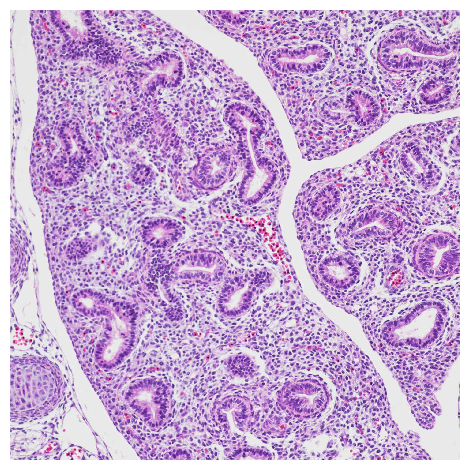

In [27]:
# read the sample image and display it
micImage = io.imread('mouse_gut_tissue.jpeg')
plt.figure()
plt.axis('off')
io.imshow(micImage)


It's always helpful to also check the size of the image. While we do that, let's also look at the type:

In [28]:
print("The image is of the type {} with dimensions {}".format(type(micImage), micImage.shape))

The image is of the type <class 'numpy.ndarray'> with dimensions (1920, 1920, 3)


This is very helpful to know. Color images generally have 3 dimensions, one dimension for each color 'channel', Red, Green, and Blue, RGB. You may run into 4 dimensions sometimes where the fourth dimension is an 'alpha' channel or when the image is multispectral. This is not the case here.

It's important to know the ratio of the image to real-life (e.g., pixel-to-meter factor). Here, I am using an image that is not mine or my collaborators', so I don't have access to this information. In a real research application, make sure you record this information.

# Grayscale Image
To apply the entropy filter, we need to first convert our color image to grayscale. We will use the rgb2gray function to do this. In MATLAB, this would correspond to the im2gray() function.

You will notice that the grayscle image only has 1 component instead of the 3 RGB channels. 

The grayscale image has dimensions (1920, 1920)


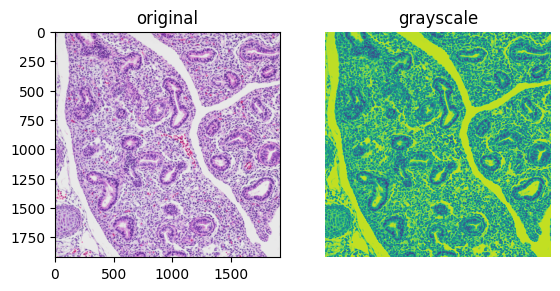

In [39]:
# convert the image to grayscale
grayImage = im.rgb2gray(micImage)
# show the images side by side
fig2, ax2 = plt.subplots(1,2)
ax2[0].imshow(micImage)
ax2[0].set_title('original')
ax2[1].imshow(grayImage)
ax2[1].set_title('grayscale')
plt.axis('off')

# check the size of the grayscale image
print("The grayscale image has dimensions {}".format(grayImage.shape))

# Choosing the Structring Element
Now that we have the grayscale image, we need a structuring element to apply the filter. 

MATLAB has a detailed definition of what a structuring element is:

"A flat structuring element is a binary valued neighborhood, either 2-D or multidimensional, in which the true pixels are included in the morphological computation, and the false pixels are not. The center pixel of the structuring element, called the origin, identifies the pixel in the image being processed."

The most common (and easiest) structuring element is a disk. Some other examples include 'octagon' and 'cube'. When you specify the structuring element, you need to specify its size. For a disk, all you need to provide is the radius.

For more information, check out: https://www.mathworks.com/help/images/structuring-elements.html


In [42]:
# create a structuring element of radius 3 
# in python, this is a numpy array class
# in MATLAB, it will be a structure class
SE3 = se.disk(3)

# check the size of the structuring element and print it
print("The grayscale image has dimensions {}".format(SE3.shape))
print(SE3)

The grayscale image has dimensions (7, 7)
[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


# apply the entropy filtration

How do you choose the radius? MATLAB puts it beautifully:
"You typically choose a structuring element the same size and shape as the objects you want to process in the input image."

As a scientist, you have expert insight in the size and dimensions of the objects in the image. For example, if you need to smidge out the cells, you will use the size of the cell here. This is why knowing the conversion factor (pixel-to-meter or meter-to-pixel) is extremely helpful. 


Without such expert insight, we can play around with the size of the structuring element, and experiment with the entropy filtration.

(-0.5, 1919.5, 1919.5, -0.5)

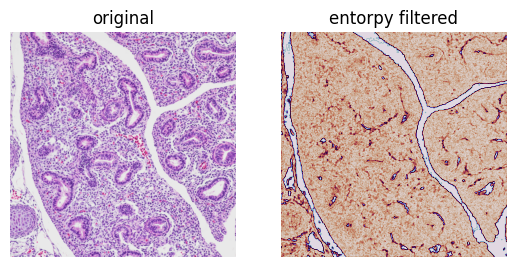

In [66]:
grayImageByte = as_ubyte(grayImage)
entropyImage = sk.filters.rank.entropy(grayImageByte, SE3)

# show the images side by side
fig2, ax2 = plt.subplots(1,2)
ax2[0].imshow(micImage)
ax2[0].set_axis_off()
ax2[0].set_title('original')
ax2[1].imshow(entropyImage, cmap = 'twilight')
ax2[1].set_title('entorpy filtered')

plt.axis('off')

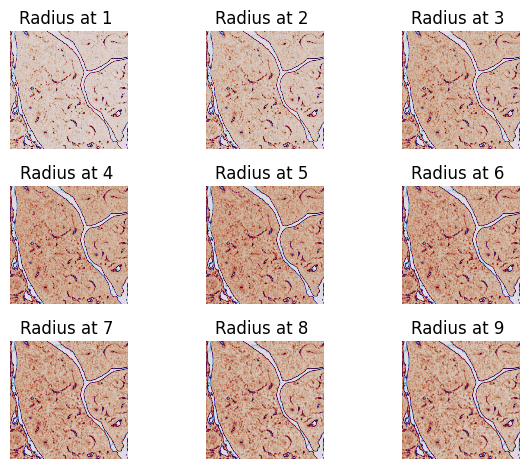

In [60]:
grayImageByte = as_ubyte(grayImage)
fig3, ax3 = plt.subplots(3,3)
for n, ax in enumerate(ax3.flatten()):
        ax.set_title('Radius at {} '.format(n + 1))
        SE = se.disk(n+1)
        ax.imshow(sk.filters.rank.entropy(grayImageByte,SE),
                  cmap = 'twilight');
        ax.set_axis_off()
